Number of estimated clusters: 7


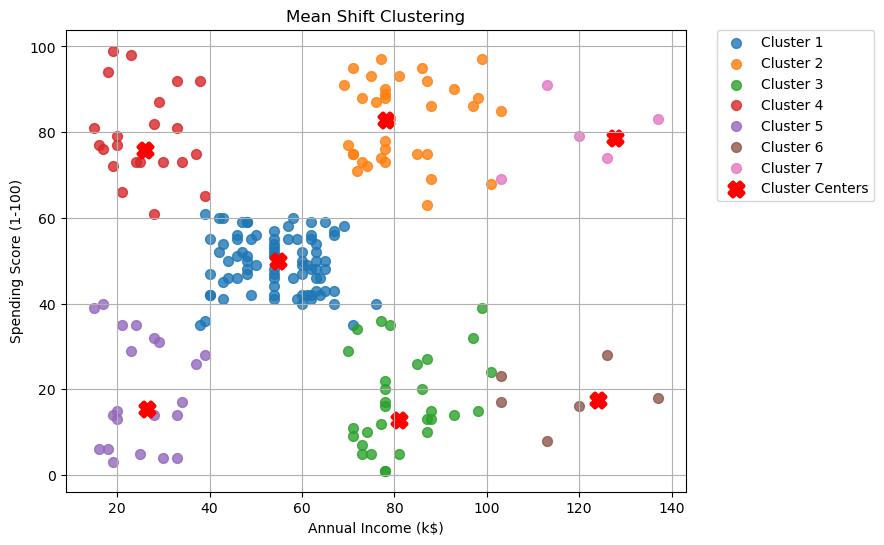

'unique_labels → contains all unique cluster IDs (e.g., [0, 1, 2]).\nThe for loop goes through each cluster one by one.\nX[labels == cluster, 0] → selects the x-values (first feature) of the points that belong to this cluster.\nX[labels == cluster, 1] → selects the y-values (second feature) of the same points.\nplt.scatter(...) → plots these points as a separate scatter plot.\nlabel=f"Cluster {cluster+1}" → gives each cluster its own legend entry (Cluster 1, Cluster 2, etc.).\n\ncluster_centers[:, 0] → x-coordinates of all cluster centers.\ncluster_centers[:, 1] → y-coordinates of all cluster centers.\nc=\'red\' → makes the markers red.\nmarker=\'X\' → uses a big X-shaped marker (to stand out from circles).\ns=100 → marker size (100 points big).\nlinewidths=3 → makes the strokes of the X thicker.\nlabel=\'Cluster Centers\' → adds this entry to the legend box.\n\n\n#X[:, 0] → values for the x-axis (first feature, e.g., Annual Income).\n#X[:, 1] → values for the y-axis (second feature, e

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values   # Annual Income & Spending Score

"""In Mean Shift clustering, the bandwidth is the radius (window size)
used to search for nearby points when computing the mean.
quantile (like 0.1): → smaller window → more clusters.
quantile (like 0.3 or 0.4): → bigger window → fewer clusters."""
# Apply Mean Shift clustering
from sklearn.cluster import MeanShift, estimate_bandwidth
bandwidth = estimate_bandwidth(X, quantile=0.11)
clustering = MeanShift(bandwidth=bandwidth,bin_seeding=True).fit(X)

# Extract results
labels = clustering.labels_
cluster_centers = clustering.cluster_centers_
n_clusters_ = len(np.unique(labels))
print(f"Number of estimated clusters: {n_clusters_}")
unique_labels = np.unique(labels)

#Visualize the results
plt.figure(figsize=(8, 6))
# Plot each cluster separately with a label
for cluster in unique_labels:
    plt.scatter(X[labels == cluster, 0], X[labels == cluster, 1],
                marker='o', s=50, alpha=0.8,
                label=f"Cluster {cluster+1}")
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', 
            marker='X', s=100, linewidths=3, label='Cluster Centers')
plt.title('Mean Shift Clustering')
plt.xlabel(dataset.columns[3])
plt.ylabel(dataset.columns[4])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#plt.legend()
plt.grid(True)
plt.show()

#notes matplotlib
"""unique_labels → contains all unique cluster IDs (e.g., [0, 1, 2]).
The for loop goes through each cluster one by one.
X[labels == cluster, 0] → selects the x-values (first feature) of the points that belong to this cluster.
X[labels == cluster, 1] → selects the y-values (second feature) of the same points.
plt.scatter(...) → plots these points as a separate scatter plot.
label=f"Cluster {cluster+1}" → gives each cluster its own legend entry (Cluster 1, Cluster 2, etc.).

cluster_centers[:, 0] → x-coordinates of all cluster centers.
cluster_centers[:, 1] → y-coordinates of all cluster centers.
c='red' → makes the markers red.
marker='X' → uses a big X-shaped marker (to stand out from circles).
s=100 → marker size (100 points big).
linewidths=3 → makes the strokes of the X thicker.
label='Cluster Centers' → adds this entry to the legend box.


#X[:, 0] → values for the x-axis (first feature, e.g., Annual Income).
#X[:, 1] → values for the y-axis (second feature, e.g., Spending Score).
#c=labels → colors the points based on their cluster labels (each cluster gets a different color).
#cmap='viridis' → applies the Viridis color map (a nice gradient color scheme).
#marker='o' → makes each point a circle marker ('o').
#s=50 → sets the size of each marker (50 points).
#alpha=0.8 → sets transparency (1 = solid, 0 = invisible).
#
single line with color
#plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o',label='Clusters')

"""

